In [17]:
from PIL import Image
from lxml import etree
from dm_control.suite import common
from dm_control.mujoco import Physics

In [3]:
mjcf = etree.fromstring(common.read_model("swimmer.xml"))

In [9]:
print(etree.tostring(mjcf, pretty_print=True).decode())

<mujoco model="swimmer">
  <include file="./common/visual.xml"/>
  <include file="./common/skybox.xml"/>
  <include file="./common/materials.xml"/>

  <option timestep="0.002" density="3000">
    <flag contact="disable"/>
  </option>

  <default>
    <default class="swimmer">
      <joint type="hinge" pos="0 -.05 0" axis="0 0 1" limited="true" solreflimit=".05 1" solimplimit="0 .8 .1" armature="1e-6"/>
      <default class="inertial">
        <geom type="box" size=".001 .05 .01" rgba="0 0 0 0" mass=".01"/>
      </default>
      <default class="visual">
        <geom type="capsule" size=".01" fromto="0 -.05 0 0 .05 0" material="self" mass="0"/>
      </default>
      <site size=".01" rgba="0 0 0 0"/>
    </default>
    <default class="free">
      <joint limited="false" stiffness="0" armature="0"/>
    </default>
    <motor gear="5e-4" ctrllimited="true" ctrlrange="-1 1"/>
  </default>

  <worldbody>
    <geom name="ground" type="plane" size="2 2 0.1" material="grid"/>
    <body name="

In [14]:
physics = Physics.from_xml_string(etree.tostring(mjcf), assets=common.ASSETS)

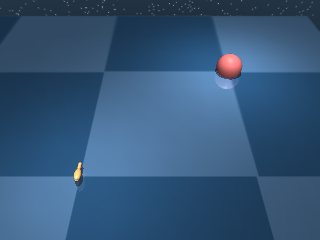

In [18]:
Image.fromarray(physics.render())

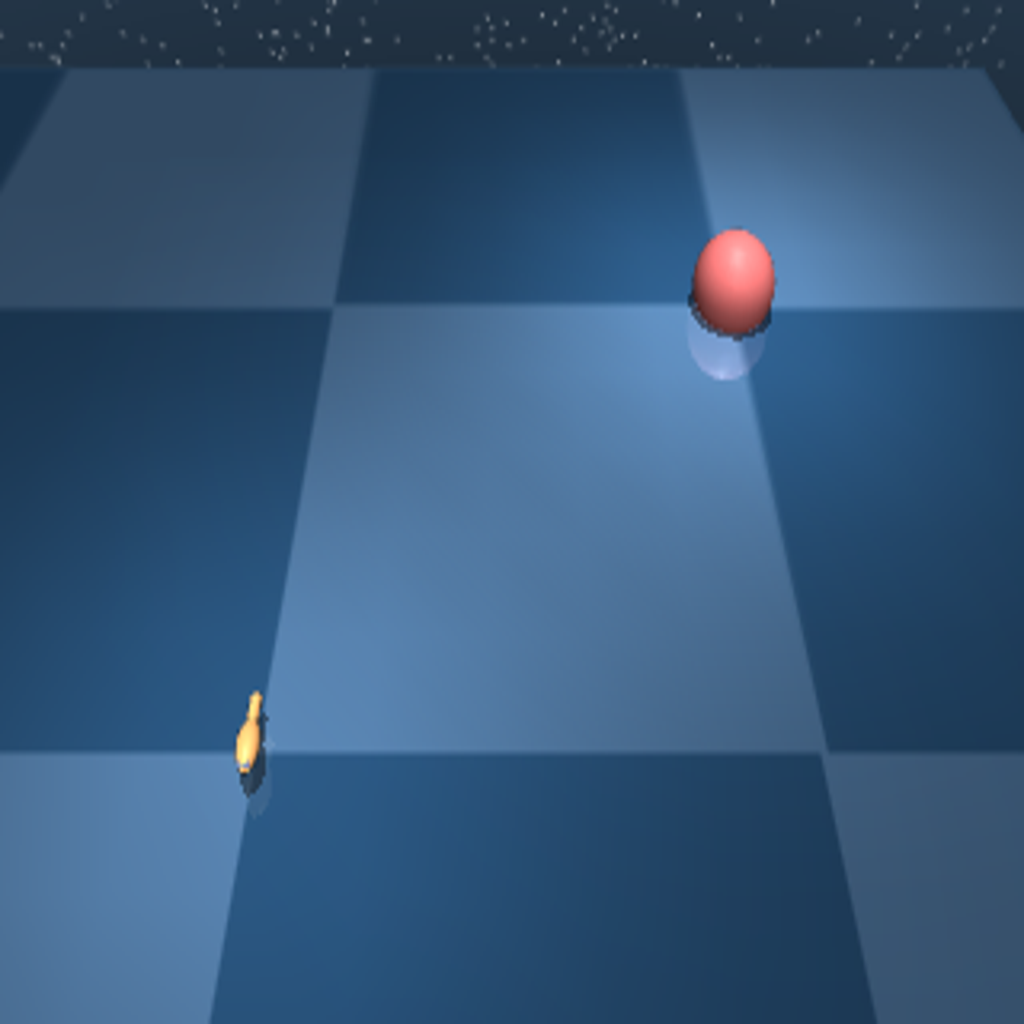

In [27]:
physics = Physics.from_xml_path('/Users/akhildevarashetti/code/reward_lab/exp/mujoco_exp/scratch/scratch.xml')
Image.fromarray(physics.render()).resize((1024, 1024))